In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import sys
# dir_path='../control_transition'
# sys.path.append(dir_path)

In [ ]:
# from plot_utils import *

In [2]:
from rqc import *

In [ ]:
# from importlib import reload


# import plot_utils
# reload(plot_utils)
# from plot_utils import *

In [ ]:
from diffusion_utils import *

In [ ]:
from importlib import reload


import diffusion_utils
reload(diffusion_utils)
from diffusion_utils import *

# API

In [5]:
params_list=[
# ({'nu':0,'de':1,},{'L':np.arange(10,31,10),'p_ctrl':[0.4,.5,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(0,20)}),
# ({'nu':0,'de':1,},{'L':np.arange(10,31,10),'p_ctrl':[.5,0.4,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(0,2000)}),
({'nu':0,'de':1,},{'s':np.arange(0,10),'L':[20],'p_ctrl':[.5],'p_proj':np.linspace(0.0,0.0,1),}),
# ,0.4,0.59
# ({'nu':0,'de':1,},{'p_ctrl':np.linspace(0.4,0.6,21),'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(2000),'L':np.arange(20,61,10)}),
# ({'nu':0,'de':1,},{'p_ctrl':[0.4,0.5,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(10000),'L':np.arange(20,61,10)}),
]

In [ ]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_s{s}_coherence.json',
        fn_dir_template='/home/jake/Data',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        # data_dict_file='xj({nu},{de})_coherence.pickle', 
        zip_fn='/home/jake/Data/MPS_0-1_coherence_x01.zip'
        # zip_fn='./MPS_0-1_coherence_x01.zip'
    )
df_MPS_0_T=convert_pd(data_MPS_0_T_dict,names=['Metrics','L','p_ctrl','p_proj','T'])

In [ ]:
L=20
state_fluct=[df_MPS_0_T.xs('fdw',level='Metrics').xs(L,level='L').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').iloc[x]['observations'][1] for x in range(2*L**2+1)]

(0.0, 100.0)

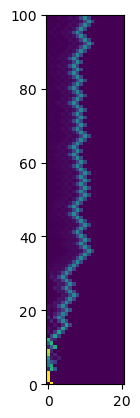

In [ ]:
plt.imshow(state_fluct)
plt.ylim(0,100)

In [ ]:
with open('state_fluct.pickle','wb') as f:
    pickle.dump(state_fluct,f)

In [ ]:
d=load_json("MPS_(0,1)_L20_pctrl0.500_pproj0.000_sC0_sm0_x01_DW_T.json")

NameError: name 'load_json' is not defined

In [ ]:
state_fluct = np.array(d['fdw']).T 

NameError: name 'd' is not defined

In [ ]:
with open('state_fluct.pickle','wb') as f:
    pickle.dump(state_fluct,f)

(20.0, 0.0)

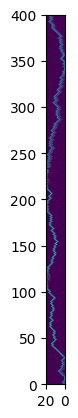

In [ ]:
plt.imshow( state_fluct)
# plt.imshow( np.array(d['fdw']).T )
plt.ylim(0,400)
plt.xlim(20,0)

In [ ]:
np.array(d['fdw'])[:,:100].T

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.08734458e-01, 1.83112632e-01, 4.08152911e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.95590764e-03, 3.87437156e-01, 1.95454026e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.83185048e-08, 4.30286060e-08, 5.34112225e-08, ...,
        0.00000000e+00, 0.00000000e+00, 3.59378594e-38],
       [1.18237647e-08, 1.40628783e-08, 8.54604679e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.25968096e-09, 1.28018855e-08, 8.82507652e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [6]:
d=load_json("MPS_(0,1)_L6_pctrl0.400_pproj0.000_sC2_sm0_x01_Oi_T.json")

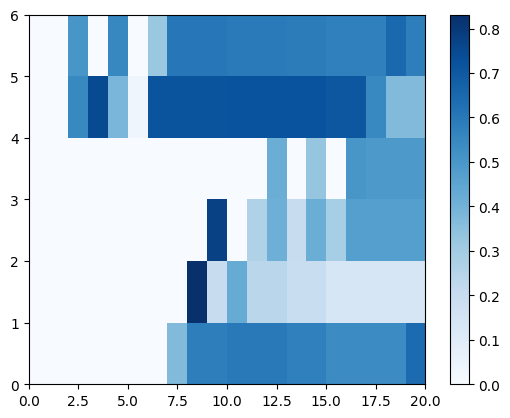

In [7]:
plt.pcolormesh(
    (1-np.array(d['Oi'])[:,:20])/2, cmap='Blues')
plt.colorbar()

In [ ]:
d['op_history']

[[{'Site': [10], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [9, 10], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [10], 'Outcome': [1], 'Type': 'Control'}],
 [{'Site': [9, 10], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [10], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [9, 10], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [10], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [9, 10], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [10], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [9], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [8, 9], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [9], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [8, 9], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [9, 10], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [10, 1], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [1, 2], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [2, 3], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [3, 4], 'Outcome'